<a href="https://colab.research.google.com/github/oq-Yuki-po/TensorFlowTutorial/blob/develop/%E5%88%9D%E5%BF%83%E8%80%85%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE_TensorFlow_2_0_%E5%85%A5%E9%96%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考URL：https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja



# 目標
以下のことを行う
- 画像を分類するニューラルネットワークを構築する
- このニューラルネットワークを訓練する
- モデルの性能を評価する

## パッケージの用意

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# tensorflowのver確認
print(tf.__version__)

2.3.0


## データセットを用意
今回はMNISTを使用する

他のデータセット：https://www.tensorflow.org/api_docs/python/tf/keras/datasets?hl=JA

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# サンプルを整数から浮動小数点数に変換（0から255を0から1の範囲に変換） 
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# データの形を確認
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


- 訓練データ：60000枚
- テストデータ：10000枚

## モデルの構築

### 処理の流れ


1.   28✖️28の２次元データを１次元に平滑（へいかつ）化
    > tf.keras.layers.Flatten  
    > input_shape=(28, 28)で入力されるデータの形を指定している
2.   隠れ層の定義
    > tf.keras.layers.Dense  
    > 128はユニットの数（ニューロンの数）
    > activation='relu'は活性化関数　ReLUを指定している  
    > 他の活性化関数：https://www.tensorflow.org/api_docs/python/tf/keras/activations?hl=ja
3.   ドロップアウトの定義
    > 過学習を防ぐためにランダムにいくつかのニューロンを無効にする
    > 0.2で2割を無効にする
4.   全結合層の定義
    > 最終的に10個クラスに分類するので10を指定する

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

### 学習前の予測

クラスごとに"ロジット"や"対数オッズ比"と呼ばれるスコアを算出する

#### 予測するデータを可視化

数字の5かな？？

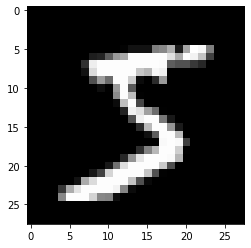

In [6]:
plt.figure()
plt.imshow(x_train[0] * 255, cmap="gray")
plt.grid(False)
plt.show()

#### 学習前のモデルで予測

In [7]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.21802238,  0.2598156 , -0.4770103 , -0.05525459,  0.06075118,
         0.15736756, -0.14129621,  0.4870325 ,  0.44391733,  0.05036739]],
      dtype=float32)

#### 予測時の投入するデータの形
`x_train[0]`だと形が合わないので注意

In [8]:
print(x_train[0].shape)
print(x_train[:1].shape)

(28, 28)
(1, 28, 28)


#### スコアを確率に変換

In [9]:
predictions_probability = tf.nn.softmax(predictions).numpy()
print(predictions_probability)
# 予測された確率から最大要素のインデックスを取得
np.argmax(predictions_probability)

[[0.07305478 0.11780699 0.05638605 0.0859682  0.09654249 0.10633554
  0.07888064 0.1478598  0.14162028 0.0955452 ]]


7

## 損失関数の定義

#### 損失関数

交差エントロピーを採用している

他の損失関数：https://www.tensorflow.org/api_docs/python/tf/keras/losses?hl=ja

In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
loss_fn(y_train[:1], predictions).numpy()

2.2411556

#### モデルのコンパイル
学習のためのモデルを定義している

- optimizer：最適化アルゴリズム
    - 今回は`Adam`を指定
    - その他の最適化アルゴリズム：https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- loss：損失関数
    - 今回は`交差エントロピー`を指定
- metrics：学習及びテスト中に定量化される項目
    - 今回は`accuracy（正確性）`を指定

In [12]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

#### モデルの学習
エポックを5にして学習を行う  
エポック：１つの訓練データを何回繰り返して学習させるか」の数のこと

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2978 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1393 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1054 - accuracy: 0.9685
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0854 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0753 - accuracy: 0.9762


#### モデルの性能評価

テストデータを使用してモデルの損失値と正確性を算出する  
`verbose`はプログレスバーを表示するかどうかのオプション  
今回のモデルはテストデータにおいて97%の正解率を示している

In [14]:
model.evaluate(x_test,  y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9780


[0.07178077101707458, 0.9779999852180481]

#### モデルの出力を変更
数値ではなく確率を出力する場合

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

予測：7 正解：7


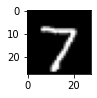

予測：2 正解：2


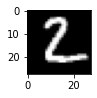

予測：1 正解：1


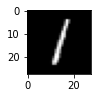

予測：0 正解：0


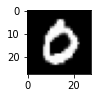

予測：4 正解：4


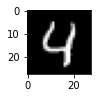

In [16]:
predictions = probability_model(x_test[:5])

# 予測と正解を可視化して比べてみる
for index, prediction in enumerate(predictions):
    print(f'予測：{np.argmax(prediction)} 正解：{y_test[index]}')
    ax = plt.subplot(3, 3, index + 1)
    plt.imshow(x_test[index] * 255, cmap="gray")
    plt.show()